# ADDDM Case Study II: Understanding Quality Perceptions of Smartphones - Factor Analysis

Group 11:

- Yasaman Sadat Mirrezaei Roudaki
- Zeynep Gultug Aydemir


In [ ]:
install.packages('rcompanion')
install.packages('nortest')
install.packages('corrplot')
install.packages('olsrr')
install.packages('dplyr')
install.packages('pastecs')
install.packages('REdaS')
install.packages('psych')
install.packages('lm.beta')
install.packages('ggplot2')
install.packages("tidyverse")
install.packages('GPArotation')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘TH.data’, ‘sandwich’, ‘mvtnorm’, ‘expm’, ‘Rcpp’, ‘Exact’, ‘gld’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘zoo’, ‘DescTools’, ‘multcompView’, ‘plyr’, ‘coin’, ‘lmtest’, ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘shiny’, ‘car’, ‘goftest’, ‘gridExtra’, ‘xplorerr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’


In [ ]:
install.packages('semPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘coda’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘arm’, ‘minqa’, ‘nloptr’, ‘xtable’, ‘openxlsx’, ‘RUnit’, ‘mvtnorm’, ‘Rcpp’, ‘psych’, ‘Hmisc’, ‘jpeg’, ‘png’, ‘reshape2’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘pbapply’, ‘abind’, ‘mnormt’, ‘pbivnorm’, ‘numDeriv’, ‘quadprog’, ‘mi’, ‘lme4’, ‘carData’, ‘kutils’, ‘RcppParallel’, ‘RcppEigen’, ‘StanHeaders’, ‘BH’, ‘rpf’, ‘qgraph’, ‘lavaan’, ‘sem’, ‘plyr’, ‘XML’, ‘igraph’, ‘lisrelToR’, ‘rockchalk’, ‘corpcor’, ‘OpenMx’




In [ ]:
install.packages('semTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(nortest) #Kolmogorov-Smirnov-Test
library(corrplot) #correlation matrix plot
library(olsrr)  #VIF and Tolerance Values
library(dplyr)
library(pastecs)
library(REdaS) #Bartelett's Test
library(psych)
library(lm.beta)
library(tidyverse)
library(knitr)
library(GPArotation)

corrplot 0.92 loaded


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: grid

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ purrr::%||%()    masks base::%||%()
✖ ggplot2::alpha() masks psych::alpha()
✖ tidyr::extract() masks pastecs::extract()
✖ dplyr::filter()  masks stats::filter()
✖ pastecs::first

In [ ]:
Sys.setlocale("LC_ALL", "C")

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

# Q1: Orthogonal Factor Analysis

In this analysis, we're making a study into the dynamics influencing the perception towards the smartphone quality among various consumers. Our primary objective is to uncover underlying factors that significantly impact user satisfaction and understanding of quality.

By conducting the factor analysis techniques, we aim to break down the questionnaire into simpler patterns, enabling us to identify critical components that define the quality of a smartphone. The results will be crucial from the managerial perspective in guiding strategic improvements and innovation.


## Q1-0. Preparing the data

In [ ]:
data = read.csv("Data File_Case_Study_Factor Analysis_MD.csv", header=TRUE)
head(data)

,ownership,usage_freq,usingSince,typicalUse,brand,cost,starRating,intro_q,qd1,qd2,⋯,def_sev2,didComplain,reactionComplain,nextPurchase,intro_d,gender,age,education,income,brandrec
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,2,4,4,1,1,3,1,3,4,⋯,NA,NA,NA,NA,1,2,5,3,17,1
2,1,2,3,3,1,1,4,1,4,4,⋯,NA,NA,NA,NA,1,2,5,3,4,1
3,1,2,5,4,1,1,4,1,3,4,⋯,NA,NA,NA,NA,1,1,6,7,17,1
4,1,2,4,4,1,2,4,1,5,5,⋯,NA,NA,NA,NA,1,1,6,5,2,1
5,1,2,5,4,1,1,4,1,4,4,⋯,1,2,NA,2,1,2,6,5,2,1
6,1,2,5,4,1,2,3,1,3,4,⋯,NA,NA,NA,NA,1,1,5,4,3,1


In [ ]:
variables = read.csv("Data File_Case Study_Factor Analysis_Variables.csv", header = TRUE, stringsAsFactors = FALSE)
head(variables)

,name,Label
,<chr>,<chr>
1,ownership,Do you currently own a smartphone?
2,usage_freq,"How frequently do you use a smartphone in your daily routine? (eg. calls, office work, social net..."
3,usingSince,Since when do you own your current smartphone ?
4,typicalUse,How long do you typically use a smartphone before purchasing a new one?
5,brand,What is the brand of your current smartphone ? (In case if you own more than one smartphone kindl...
6,cost,What was the price you paid for your current smartphone?


We start by getting to know our dataset. We have a set of responses from a comprehensive survey targeting smartphone users, focusing on various aspects of their experience. These variables will be serving as the foundation for our following factor analysis.


Prior to analysis, there are some preprocessing steps we need to take, to ensure the integrity and comparability of our dataset.
This involves handling missing values list-wise, excluding the questions that won't contribute to our study such as gender or age.

We start by cropping the 33 question out, then follow it by deleting the rows that contain any empty cell in those questions.

In [ ]:

list_na =colnames(data[9:41])[apply(data[9:41],2,anyNA)]
list_na

[1] "qd22" "qd26" "qd28" "qd29" "qd31" "qd33"

In [ ]:
cleaned_data = data %>% select(9:41, wtp1, wtp2, wtp3, ri1, ri2, brandrec) %>% filter(complete.cases(.))

In [ ]:
head(cleaned_data)

,qd1,qd2,qd3,qd4,qd5,qd6,qd7,qd8,qd9,qd10,⋯,qd30,qd31,qd32,qd33,wtp1,wtp2,wtp3,ri1,ri2,brandrec
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,4,3,3,4,3,4,3,3,3,⋯,4,4,3,3,5,4,5,6,6,1
2,4,4,3,6,4,4,4,4,4,4,⋯,4,3,4,3,4,5,4,5,6,1
3,3,4,3,2,3,3,3,4,3,3,⋯,4,4,3,3,4,4,4,5,6,1
4,5,5,4,3,5,5,5,5,4,5,⋯,5,5,5,5,1,1,1,2,6,1
5,4,4,5,2,3,3,4,4,3,4,⋯,4,4,4,4,4,2,2,6,5,1
6,3,4,3,5,3,3,4,3,3,3,⋯,3,3,3,4,3,3,2,5,5,1


Now that we have a more suitable dataset at hand, we can go through the steps of our factor analysis.

## Q1-1. Check the Correlation Matrix and Confirm Suitability for Factor Analysis

First of all, we'll start by evaluating the adequacy of the data for factor analysis through correlation matrix, Bartlett Test, KMO Criterion and anti-image correlations.

In [ ]:
round(stat.desc(cleaned_data, norm=TRUE),digits=3)

,qd1,qd2,qd3,qd4,qd5,qd6,qd7,qd8,qd9,qd10,⋯,qd30,qd31,qd32,qd33,wtp1,wtp2,wtp3,ri1,ri2,brandrec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000,⋯,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000,969.000
nbr.null,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
nbr.na,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,⋯,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,5.000,5.000,5.000,7.000,5.000,5.000,5.000,5.000,5.000,5.000,⋯,5.000,5.000,5.000,5.000,7.000,7.000,7.000,7.000,7.000,5.000
range,4.000,4.000,4.000,6.000,4.000,4.000,4.000,4.000,4.000,4.000,⋯,4.000,4.000,4.000,4.000,6.000,6.000,6.000,6.000,6.000,4.000
sum,3929.000,4054.000,3816.000,3589.000,3796.000,3630.000,4075.000,3826.000,3793.000,3929.000,⋯,4034.000,3642.000,3829.000,3803.000,4484.000,4459.000,4359.000,5134.000,5216.000,1813.000
median,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,⋯,4.000,4.000,4.000,4.000,5.000,5.000,5.000,6.000,6.000,1.000
mean,4.055,4.184,3.938,3.704,3.917,3.746,4.205,3.948,3.914,4.055,⋯,4.163,3.759,3.951,3.925,4.627,4.602,4.498,5.298,5.383,1.871


Correlation matrix is a great way to identify groups of variables that share a strong linear relationship, which is a good sign for applicability of the factor analysis.
High correlations suggest potential factors that can group these variables together, while low correlations could indicate unique characteristics.

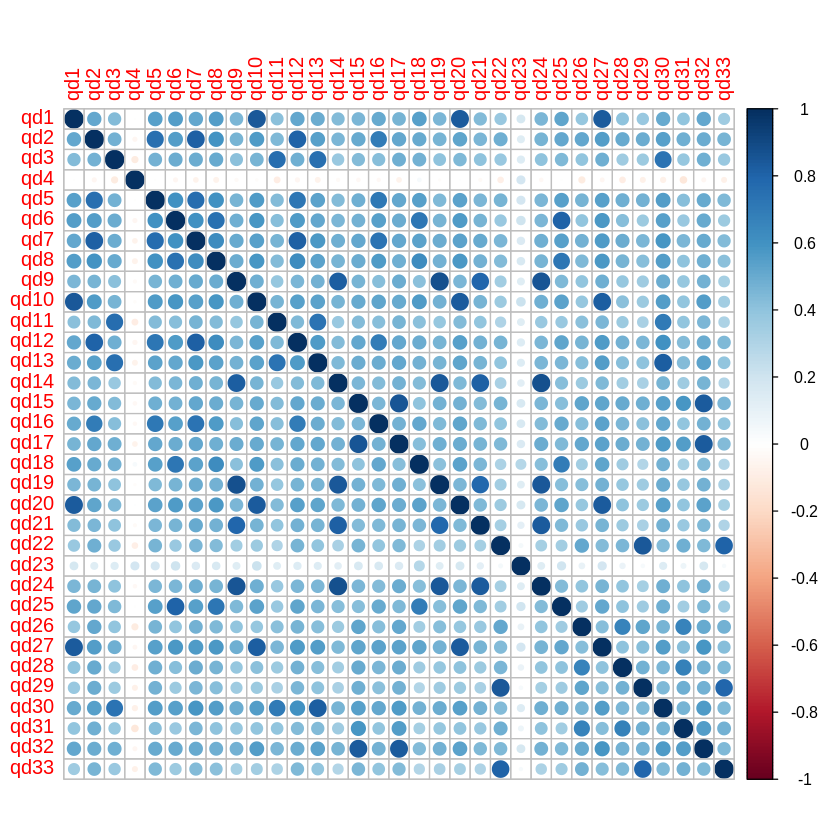

In [ ]:
# Correlation Matrix
corrmatrix <- cor(cleaned_data[1:33])
corrplot(as.matrix(corrmatrix))

Our correlation matrix shows us very strong correlations between variables, therefore positive results regarding the factorability.
Since the questions 4 and 23 show a notable amount of low correlation score, in the following steps we'll keep this in mind.

In [ ]:
#Bartlett-Test
bart_spher(cleaned_data[1:33])

	Bartlett's Test of Sphericity

Call: bart_spher(x = cleaned_data[1:33])

     X2 = 30857.911
     df = 528
p-value < 2.22e-16

The Bartlett's Test of Sphericity has yielded a chi-square value of 30857.911 with 528 degrees of freedom. Given that the p-value is less than 2.22e-16, we can confirm that the our correlation matrix is significantly different from the identity matrix, affirming that it's suitable for factor analysis.
This result is confirming the highly correlated relationship between the variables in our dataset as we saw with the correlation matrix earlier.


In [ ]:
KMOTEST=KMOS(cleaned_data[1:33])

#KMO Criterion
KMOTEST


Kaiser-Meyer-Olkin Statistics

Call: KMOS(x = cleaned_data[1:33])

Measures of Sampling Adequacy (MSA):
      qd1       qd2       qd3       qd4       qd5       qd6       qd7       qd8 
0.9611377 0.9665563 0.9570940 0.6422860 0.9794715 0.9562057 0.9700763 0.9809143 
      qd9      qd10      qd11      qd12      qd13      qd14      qd15      qd16 
0.9614243 0.9700651 0.9553342 0.9692788 0.9604076 0.9606687 0.9463654 0.9818514 
     qd17      qd18      qd19      qd20      qd21      qd22      qd23      qd24 
0.9526272 0.9694107 0.9596475 0.9660218 0.9745578 0.9273572 0.9025359 0.9572029 
     qd25      qd26      qd27      qd28      qd29      qd30      qd31      qd32 
0.9554307 0.9658695 0.9662994 0.9620148 0.9348269 0.9651743 0.9595275 0.9632269 
     qd33 
0.9502085 

KMO-Criterion: 0.961722


Kaiser-Meyer-Olkin (KMO) measure of sampling adequacy is 0.961722, which is remarkably close to 1. This suggests that the proportion of variance in our variables that might be caused by underlying factors is high.

Consequently, factor analysis is considered suitable and likely to yield meaningful factors.


In [ ]:
#Anti-Image Correlations
sort(KMOTEST$MSA)

qd4      qd23      qd22      qd29      qd15      qd33      qd17      qd11 
0.6422860 0.9025359 0.9273572 0.9348269 0.9463654 0.9502085 0.9526272 0.9553342 
     qd25       qd6       qd3      qd24      qd31      qd19      qd13      qd14 
0.9554307 0.9562057 0.9570940 0.9572029 0.9595275 0.9596475 0.9604076 0.9606687 
      qd1       qd9      qd28      qd32      qd30      qd26      qd20      qd27 
0.9611377 0.9614243 0.9620148 0.9632269 0.9651743 0.9658695 0.9660218 0.9662994 
      qd2      qd12      qd18      qd10       qd7      qd21       qd5       qd8 
0.9665563 0.9692788 0.9694107 0.9700651 0.9700763 0.9745578 0.9794715 0.9809143 
     qd16 
0.9818514

In [ ]:
head(cleaned_data)

,qd1,qd2,qd3,qd4,qd5,qd6,qd7,qd8,qd9,qd10,⋯,qd30,qd31,qd32,qd33,wtp1,wtp2,wtp3,ri1,ri2,brandrec
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,4,3,3,4,3,4,3,3,3,⋯,4,4,3,3,5,4,5,6,6,1
2,4,4,3,6,4,4,4,4,4,4,⋯,4,3,4,3,4,5,4,5,6,1
3,3,4,3,2,3,3,3,4,3,3,⋯,4,4,3,3,4,4,4,5,6,1
4,5,5,4,3,5,5,5,5,4,5,⋯,5,5,5,5,1,1,1,2,6,1
5,4,4,5,2,3,3,4,4,3,4,⋯,4,4,4,4,4,2,2,6,5,1
6,3,4,3,5,3,3,4,3,3,3,⋯,3,3,3,4,3,3,2,5,5,1


 Moreover, the individual KMO values for each variable are well above the acceptable threshold of 0.5, further confirming the adequacy of our data for this study.

## Q1-2. Factor Extraction Method - Principal Axes Factoring

For the first step of our study, we'll be choosing Principal Axes Factoring with varimax rotation for our factor extraction method.

First, we'll apply the PAF on the whole data and review the results.

In [ ]:
fa_paf <- fa(cleaned_data[1:33], nfactors = ncol(cleaned_data[1:33]), rotate = "varimax")

integer(0)

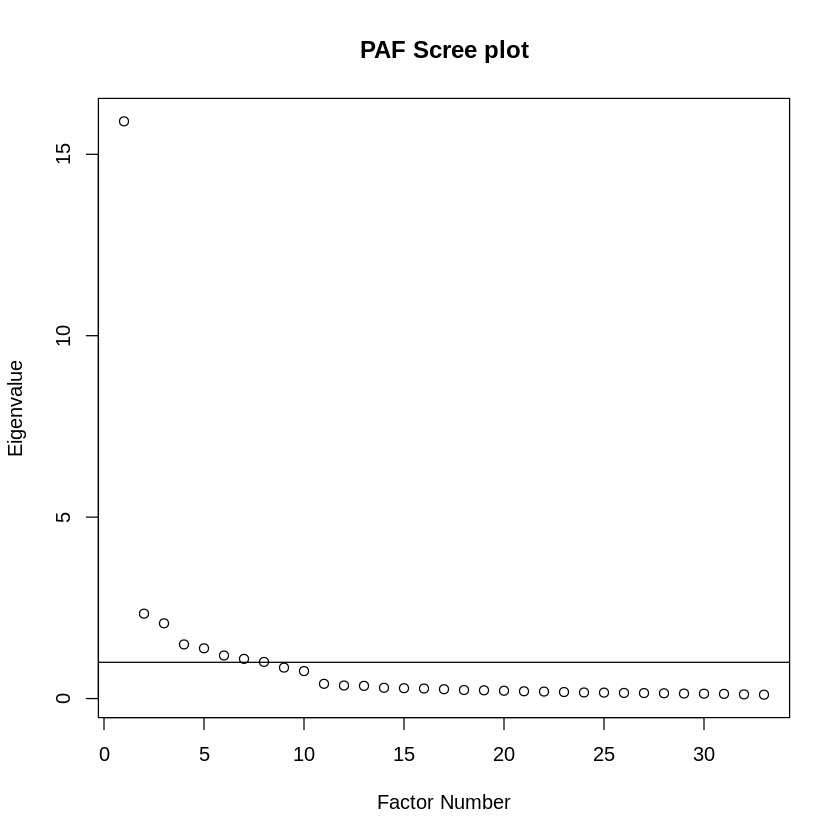

In [ ]:
plot(fa_paf$e.values,xlab="Factor Number",ylab="Eigenvalue",main="PAF Scree plot")+abline(h=1)

In [ ]:
eigenvalues = fa_paf$e.values
eigenvalues

[1] 15.9082244  2.3398002  2.0741379  1.4922324  1.3853335  1.1868699
 [7]  1.0936900  1.0096776  0.8530507  0.7579386  0.4066927  0.3605823
[13]  0.3509690  0.2970630  0.2858756  0.2773086  0.2574310  0.2361584
[19]  0.2273536  0.2155112  0.2007128  0.1929568  0.1801325  0.1682817
[25]  0.1640197  0.1555231  0.1520528  0.1461674  0.1384577  0.1338676
[31]  0.1288620  0.1156120  0.1074529

According to the scree test, we can move on with a 8 factor solution as the first 9 eigenvalues are above 1.

In [ ]:
variance = eigenvalues / ncol(cleaned_data[1:33]) * 100
sum_variance = cumsum(eigenvalues / ncol(cleaned_data[1:33]))

sum_explained_variance = cbind(eigenvalue = eigenvalues, variance=variance, total_variance=sum_variance)
sum_explained_variance

eigenvalue,variance,total_variance
15.9082244,48.2067407,0.4820674
2.3398002,7.0903037,0.5529704
2.0741379,6.2852665,0.6158231
1.4922324,4.5219164,0.6610423
1.3853335,4.1979804,0.7030221
1.1868699,3.5965755,0.7389878
1.0936900,3.3142121,0.7721300
1.0096776,3.0596291,0.8027262
0.8530507,2.5850023,0.8285763
0.7579386,2.2967837,0.8515441


In [ ]:
data.frame(sort(fa_paf$communality))

,sort.fa_paf.communality.
,<dbl>
qd4,0.2899776
qd23,0.3309972
qd28,0.7233472
qd26,0.7243669
qd16,0.7411509
qd31,0.7562535
qd18,0.7646086
qd8,0.7649222
qd5,0.7992879


When we look at the communalities, we again see question 4 and 23 show relatively low values. It's best if we evaluate these questions separately since they might disrupt the analysis, considering they also had very little correlationg with the rest of the variables.

To confirm this decision, we'll run two separate PAF and compare the results before we move further.

In [ ]:
fa_paf_8 = fa(cleaned_data[1:33], nfactors = 8, rotate = "varimax")

In [ ]:
print(fa_paf_8$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR2    MR1    MR5    MR7    MR4    MR3    MR6    MR8   
qd9   0.829                                                 
qd14  0.852                                                 
qd19  0.834                                                 
qd21  0.787                                                 
qd24  0.862                                                 
qd2          0.725                                          
qd5          0.646         0.301                            
qd7          0.737                                          
qd12         0.710                                          
qd16         0.616                                          
qd1                 0.794                                   
qd10                0.745                                   
qd20                0.769                                   
qd27                0.742                                   
qd6                        0.748                            
qd8          

In [ ]:
data.frame(sort(fa_paf_8$communality))

,sort.fa_paf_8.communality.
,<dbl>
qd4,0.04090199
qd23,0.08765688
qd16,0.64073594
qd18,0.64637489
qd26,0.64888598
qd28,0.67739749
qd8,0.68063045
qd31,0.70581286
qd11,0.71687723


When we look at the 8 factor structure, first thing to notice is how qd4 and qd23 have remarkably lower loadings on all factors, which now confirm our worries on that these variables either represent unique dimensions not well captured by the identified factors or are not as strongly associated with the underlying constructs as other variables.


Following this, it's going to be the best if we exclude this two questions from our analysis to have a more reliable result.

In [ ]:
# Dropping the questions 4 and 23
data_v2 = cleaned_data[1:33][ , -c(4,23)]
head(data_v2)

,qd1,qd2,qd3,qd5,qd6,qd7,qd8,qd9,qd10,qd11,⋯,qd24,qd25,qd26,qd27,qd28,qd29,qd30,qd31,qd32,qd33
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,3,4,3,4,3,4,3,3,3,3,⋯,3,3,4,3,3,3,4,4,3,3
2,4,4,3,4,4,4,4,4,4,3,⋯,4,4,3,4,3,3,4,3,4,3
3,3,4,3,3,3,3,4,3,3,4,⋯,3,3,4,3,4,4,4,4,3,3
4,5,5,4,5,5,5,5,4,5,5,⋯,4,5,4,5,4,5,5,5,5,5
5,4,4,5,3,3,4,4,3,4,5,⋯,3,2,4,4,4,4,4,4,4,4
6,3,4,3,3,3,4,3,3,3,3,⋯,3,3,4,3,3,4,3,3,3,4


In [ ]:
fa_paf_v2 <- fa(data_v2, nfactors = ncol(data_v2), rotate = "varimax")

integer(0)

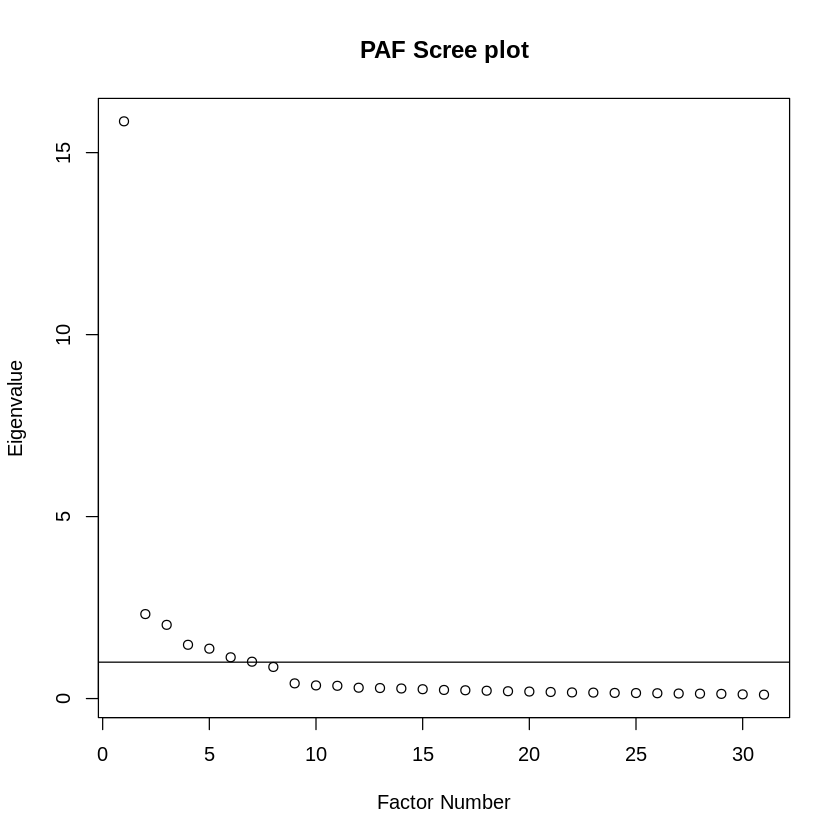

In [ ]:
plot(fa_paf_v2$e.values,xlab="Factor Number",ylab="Eigenvalue",main="PAF Scree plot")+abline(h=1)

In [ ]:
eigenvalues_v2 = fa_paf_v2$e.values
eigenvalues_v2 # after excluding qd4 and qd23

[1] 15.8598680  2.3217762  2.0258331  1.4781631  1.3712708  1.1343846
 [7]  1.0135713  0.8689483  0.4176516  0.3618149  0.3511069  0.2984164
[13]  0.2897893  0.2773548  0.2574651  0.2371933  0.2283675  0.2159573
[19]  0.2020993  0.1931866  0.1811551  0.1692323  0.1641484  0.1556840
[25]  0.1522619  0.1469643  0.1389878  0.1348376  0.1291215  0.1158191
[31]  0.1075695

In [ ]:
variance_v2 = eigenvalues_v2 / ncol(data_v2) * 100
sum_variance_v2 = cumsum(eigenvalues_v2 / ncol(data_v2))

sum_explained_variance_v2 = cbind(eigenvalue = eigenvalues_v2, variance=variance_v2, total_variance=sum_variance_v2)
sum_explained_variance_v2

eigenvalue,variance,total_variance
15.8598680,51.1608646,0.5116086
2.3217762,7.4896008,0.5865047
2.0258331,6.5349453,0.6518541
1.4781631,4.7682680,0.6995368
1.3712708,4.4234540,0.7437713
1.1343846,3.6593051,0.7803644
1.0135713,3.2695850,0.8130602
0.8689483,2.8030591,0.8410908
0.4176516,1.3472632,0.8545635
0.3618149,1.1671450,0.8662349


When variables qd4 and qd23 were taken our of the PAF analysis, there was a subtle but noteworthy shift in the eigenvalues. Now only 7 of the factors passes the threshold of 1 eigenvalue, but the overall pattern of variance explanation remained largely consistent, indicating the stability of our factor structure. Additionally, 7 factor now explains more than 80% of the variance now.

One more thing to notice is that, excluding questions 4 and 23 let to a slight decrease in the biggest eigenvalue to 15.86, which might initially appear counterintuitive. However, this should be a good sign for us about the possibility that qd4 and qd23 carried a proportion of the variance that did not align closely with the primary underlying construct captured by the first factor.


In any case, resulting factor solution with the remaining variables now should have a stronger mutual relationship, therefore potentially increasing the interpretability of the factors.

In [ ]:
fa_paf_v2_7 <- fa(data_v2, nfactors = 7, rotate = "varimax")

In [ ]:
print(fa_paf_v2_7$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR2   MR1   MR5   MR6   MR3   MR4   MR7  
qd9  0.826                                    
qd14 0.849                                    
qd19 0.830                                    
qd21 0.784                                    
qd24 0.859                                    
qd2        0.731                              
qd5        0.643                              
qd7        0.737                              
qd12       0.701                              
qd16       0.617                              
qd1              0.792                        
qd10             0.750                        
qd20             0.770                        
qd27             0.749                        
qd15                   0.776                  
qd17                   0.748                  
qd31                   0.511 0.370            
qd32                   0.722                  
qd22                         0.843            
qd29                         0.818            
qd

After going through a series of trial & error concerning the amount of variables and factors to keep, this factor structure seems to suit our data and our expectations the best.

We can move on with the next step now that we decided on our final factor solution: Factor analysis on 7 factors using the data that excludes questions 4 and 23.

The 7-factor model will strike an optimal balance between complexity and coherence, ensuring that each factor defines an easily distinguishable dimension of quality definition and hopefully facilitate a clear insight when we're interpreting each factor in detail

## Q1-3. Interpreting the Factors through Quality Dimension in the Literature

In this section, we'll interpret the loading scores from our final model's PAF result, and identify what each factor corresponds to in the literature of the Quality Dimensions.

In [ ]:
print(fa_paf_v2_7$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR2   MR1   MR5   MR6   MR3   MR4   MR7  
qd9  0.826                                    
qd14 0.849                                    
qd19 0.830                                    
qd21 0.784                                    
qd24 0.859                                    
qd2        0.731                              
qd5        0.643                              
qd7        0.737                              
qd12       0.701                              
qd16       0.617                              
qd1              0.792                        
qd10             0.750                        
qd20             0.770                        
qd27             0.749                        
qd15                   0.776                  
qd17                   0.748                  
qd31                   0.511 0.370            
qd32                   0.722                  
qd22                         0.843            
qd29                         0.818            
qd

In [ ]:
loadings7 <- tibble(name = rownames(fa_paf_v2_7$loadings), as.data.frame(fa_paf_v2_7$loadings[,c(1:7)]))

In [ ]:
get_top_loadings <- function(df, factor, threshold) {
  df %>%
    filter(!!sym(factor) > threshold) %>%  # Keep only loadings above the threshold, should be arbitrarily picked after reviewing the loading dataframes
    arrange(desc(!!sym(factor))) %>%  # Sort by the factor score descending
    select(name) %>% # Get the question number from name column
    pull()
}

In [ ]:
for (i in 1:7) {
  factor_name <- paste0("MR", i)
  # gets the question with the top scores for each factor
  top_loadings <- get_top_loadings(loadings7, factor_name, 0.5)
  # matching the question name from the variables df
  top_labels <- variables %>% filter(name %in% top_loadings) %>% select(name, Label)

  cat(paste0("Factor ", i, "\n"))

  for (j in 1:nrow(top_labels)) {
    cat(paste0(top_labels$name[j], ": ", top_labels$Label[j], "\n"))
  }
  cat("\n")
}


Factor 1
qd2: my smartphone  consistently performs
qd5: The performance of my smartphone  is excellent
qd7: the overall performance of my smartphone  is
qd12: how well does your smartphone  performs its core functions
qd16: the functioning speed of my smartphone (i.e. time taken to turn ON/OFF, open apps, multi-task etc) is

Factor 2
qd9: the competence of my smartphone's customer service staff is
qd14: the promptness with which my smartphone's customer service reacts to my issues is
qd19: the level of professionalism shown by the service staff is
qd21: the accessibility of my smartphone's customer service is
qd24: the responsiveness of my smartphone's customer service staff is

Factor 3
qd22: the severity of defects/glitches of my smartphone  is
qd29: the frequency of defects/glitches of my smartphone  is
qd33: my smartphone's probability of failure or malfunctioning is

Factor 4
qd3: my user experience with the various functions my smartphone  offers is/was
qd11: my experience to lea

After reviewing the questions under each factor that got the highest loading score from, we can label the factors as following:

* Factor 1: Performance
* Factor 2: Servicability
* Factor 3: Reliability
* Factor 4: Ease of Use
* Factor 5: Appearance
* Factor 6: Durability
* Factor 7: Features/Versatility

## Q1-4. Compare with Principal Component Analysis

In this section, we'll now compare our final solution of 7-factor PAF with PCA.

Both methods aim to reduce the dimensions of our data, yet they approach the problem from different angles as one analyses variance and other analyses communality.

In [ ]:
pca7 <- psych::principal(data_v2, rotate="varimax", nfactors=7, scores=TRUE)

In [ ]:
print(fa_paf_v2_7$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR2   MR1   MR5   MR6   MR3   MR4   MR7  
qd9  0.826                                    
qd14 0.849                                    
qd19 0.830                                    
qd21 0.784                                    
qd24 0.859                                    
qd2        0.731                              
qd5        0.643                              
qd7        0.737                              
qd12       0.701                              
qd16       0.617                              
qd1              0.792                        
qd10             0.750                        
qd20             0.770                        
qd27             0.749                        
qd15                   0.776                  
qd17                   0.748                  
qd31                   0.511 0.370            
qd32                   0.722                  
qd22                         0.843            
qd29                         0.818            
qd

In [ ]:
print(pca7$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     RC2   RC1   RC6   RC5   RC4   RC7   RC3  
qd9  0.846                                    
qd14 0.867                                    
qd19 0.849                                    
qd21 0.821                                    
qd24 0.867                                    
qd2        0.755                              
qd5        0.694                              
qd7        0.751                              
qd12       0.736                              
qd16       0.700                              
qd15             0.779                        
qd17             0.752                        
qd26       0.302 0.581                   0.350
qd28       0.353 0.576                        
qd31             0.680                        
qd32             0.732 0.310                  
qd1                    0.814                  
qd10                   0.778                  
qd20                   0.799                  
qd27                   0.779                  
qd

Despite the similarities in the items that loaded onto factors/components in both PAF and PCA, the variance explained by the corresponding factors/components varied slightly.

For instance, while PAF's first factor (MR2) accounted for 14.6% of the variance, PCA's first principal component (RC2) accounted for 15.0%, reflecting PCA's inclusion of total variance. However, the alignment of items to factors in PAF vs. components in PCA did not diverge significantly, underscoring the robustness of our survey instrument's construct validity.


The choice of factor extraction method can have implications for how the results are interpreted and used. The PAF method is often preferred when the research objective is to identify distinct factors within the data. Meanwhile, PCA may be more suitable for exploratory purposes, where the goal is to explain the maximum amount of variance with as few components as possible.

Both PAF and PCA offer us valuable perspectives on the factors, but the greater interpretability of the PAF results suits our focus on well-defined quality dimensions better from a managerial standpoint.

Now let's look at the similarities and differences between each solution's communality:

In [ ]:
data.frame(sort(fa_paf_v2_7$communality))

,sort.fa_paf_v2_7.communality.
,<dbl>
qd28,0.4767549
qd26,0.5139774
qd31,0.5372693
qd18,0.6261694
qd16,0.6385997
qd8,0.6847276
qd11,0.7117834
qd5,0.7187399
qd33,0.7504222


In [ ]:
data.frame(sort(pca7$communality))

,sort.pca7.communality.
,<dbl>
qd28,0.5909920
qd26,0.6160470
qd31,0.6645259
qd16,0.7211168
qd18,0.7391576
qd8,0.7431304
qd5,0.7698070
qd32,0.8016243
qd17,0.8049614


There seems to be some noteworthy differences in how each method accounted for the variance across survey items.

In the PAF model, the communalities ranged from 0.476 for qd28, the lowest, to 0.882 for qd24, the highest. On the other hand, PCA communalities were slightly higher in general, reflecting PCA's total variance approach. For example, qd24 again showed the highest communality at approximately 0.897, and even the item with the lowest communality, qd28, experienced a slight increase to 0.591.

These increased communalities in the PCA model implies its characteristic of accounting for all the variance, including both shared and unique aspects of the items.The more conservative communalities in PAF reflect its focus on shared variance and its potential to provide a factor solution that aligns more closely with the latent constructs of our literature review.


In [ ]:
fa_paf_v2_7$e.values

[1] 15.8598680  2.3217762  2.0258331  1.4781631  1.3712708  1.1343846
 [7]  1.0135713  0.8689483  0.4176516  0.3618149  0.3511069  0.2984164
[13]  0.2897893  0.2773548  0.2574651  0.2371933  0.2283675  0.2159573
[19]  0.2020993  0.1931866  0.1811551  0.1692323  0.1641484  0.1556840
[25]  0.1522619  0.1469643  0.1389878  0.1348376  0.1291215  0.1158191
[31]  0.1075695

In [ ]:
pca7$values

[1] 15.8598680  2.3217762  2.0258331  1.4781631  1.3712708  1.1343846
 [7]  1.0135713  0.8689483  0.4176516  0.3618149  0.3511069  0.2984164
[13]  0.2897893  0.2773548  0.2574651  0.2371933  0.2283675  0.2159573
[19]  0.2020993  0.1931866  0.1811551  0.1692323  0.1641484  0.1556840
[25]  0.1522619  0.1469643  0.1389878  0.1348376  0.1291215  0.1158191
[31]  0.1075695

The eigenvalues obtained from our factor analyses provide important insights into the quality dimensions that affects the repurchase behavior of customers.

Factors with higher eigenvalues represent the areas where targeted improvements could significantly influence customer retention and loyalty. These eigenvalues guide our focus to prioritize certain aspects of product quality that are likely to drive repurchase decisions, ensuring that managerial efforts and resources are effectively aligned with consumer priorities.

Considering the factor labels we've put in the previous section, we can list the factors from the highest to lowest eigenvalue scores.

Servicability seems to have the biggest relevance on the repurchase intentions while Reliability shows lower eigenvalue, therefore the lowest impact on the variance overall.

* Factor 2: Servicability
* Factor 1: Performance
* Factor 6: Durability
* Factor 5: Appearance
* Factor 4: Ease of Use
* Factor 7: Features/Versatility
* Factor 3: Reliability


# Q2: Oblique Factor Analysis

## Q2-1. FA using Promax

In the second part of our study, we're conducting an oblique factor analysis with Promax rotation to account for potential correlations between factors, which more realistically reflects the complexity of human behavior and perceptions in the quality dimensions.

The Promax rotation will allow us to explore not just the distinct dimensions of smartphone quality but also how these dimensions may interrelate.

In [ ]:
fa_paf_oblique7 <- fa(data_v2, nfactors = 7, rotate = "promax")

In [ ]:
print(fa_paf_v2_7$loadings, cutoff=0.3,sort=TRUE) # varimax


Loadings:
     MR2   MR1   MR5   MR6   MR3   MR4   MR7  
qd9  0.826                                    
qd14 0.849                                    
qd19 0.830                                    
qd21 0.784                                    
qd24 0.859                                    
qd2        0.731                              
qd5        0.643                              
qd7        0.737                              
qd12       0.701                              
qd16       0.617                              
qd1              0.792                        
qd10             0.750                        
qd20             0.770                        
qd27             0.749                        
qd15                   0.776                  
qd17                   0.748                  
qd31                   0.511 0.370            
qd32                   0.722                  
qd22                         0.843            
qd29                         0.818            
qd

In [ ]:
print(fa_paf_oblique7$loadings, cutoff=0.3,sort=TRUE) # promax


Loadings:
     MR2    MR1    MR6    MR5    MR4    MR3    MR7   
qd9   0.905                                          
qd14  0.945                                          
qd19  0.913                                          
qd21  0.852                                          
qd24  0.952                                          
qd2          0.968                                   
qd5          0.789                                   
qd7          0.968                                   
qd12         0.910                                   
qd16         0.775                                   
qd15                1.017                            
qd17                0.968                            
qd31                0.553                            
qd32                0.924                            
qd1                        0.928                     
qd10                       0.843                     
qd20                       0.887                     
qd27             

The Varimax rotation provides us a simplified, orthogonal structure, where each quality dimension is distinct and uncorrelated with others. This clarity is beneficial for understanding the independent contributions of each dimension to consumer perceptions of quality. It also yielded highest correlation as question24-factor2 with a score 0.859.

However, the Promax rotation presents a more interconnected factor structure, highlighting potential relationships between different dimensions of smartphone quality. This method has led to a factor solution where items show stronger loadings within specific factors and weaker loadings on others, enhancing the clarity of each factor's interpretation.

Now let's see if there has been a change in the factor scores and corresponding questions.

In [ ]:
oblique_loadings <- tibble(name = rownames(fa_paf_oblique7$loadings), as.data.frame(fa_paf_oblique7$loadings[,c(1:7)]))

In [ ]:
for (i in 1:7) {
  factor_name <- paste0("MR", i)
  # gets the question with the top scores for each factor
  top_loadings <- get_top_loadings(oblique_loadings, factor_name, 0.3)
  # matching the question name from the variables df
  top_labels <- variables %>% filter(name %in% top_loadings) %>% select(name, Label)

  cat(paste0("Factor ", i, "\n"))

  for (j in 1:nrow(top_labels)) {
    cat(paste0(top_labels$name[j], ": ", top_labels$Label[j], "\n"))
  }
  cat("\n")
}


Factor 1
qd2: my smartphone  consistently performs
qd5: The performance of my smartphone  is excellent
qd7: the overall performance of my smartphone  is
qd12: how well does your smartphone  performs its core functions
qd16: the functioning speed of my smartphone (i.e. time taken to turn ON/OFF, open apps, multi-task etc) is

Factor 2
qd9: the competence of my smartphone's customer service staff is
qd14: the promptness with which my smartphone's customer service reacts to my issues is
qd19: the level of professionalism shown by the service staff is
qd21: the accessibility of my smartphone's customer service is
qd24: the responsiveness of my smartphone's customer service staff is

Factor 3
qd22: the severity of defects/glitches of my smartphone  is
qd29: the frequency of defects/glitches of my smartphone  is
qd33: my smartphone's probability of failure or malfunctioning is

Factor 4
qd3: my user experience with the various functions my smartphone  offers is/was
qd11: my experience to lea

* Factor 1: Performance
* Factor 2: Servicability
* Factor 3: Reliability
* Factor 4: Ease of Use
* Factor 5: Appearance
* Factor 6: Durability
* Factor 7: Features/Versatility

With the oblique factor analysis, we obtain the same set of factor-question matches. This is a good sign with respect to the reliability of our factor labels. Now we can utilise these in our next step when applying the regression analysis on the purchase behaviours.

## Q2-2. Regression Analysis

Now we can finalize our study by taking a closer look at how these factors affect the willingness to pay premium and repurchase intentions of the customers. To do this, we'll first compute the means of these two types of dependent variables, then run a regression analysis as setting the factors independent variables.

In [ ]:
new_factors = cbind(cleaned_data,fa_paf_oblique7$scores)

In [ ]:
head(new_factors)

,qd1,qd2,qd3,qd4,qd5,qd6,qd7,qd8,qd9,qd10,⋯,ri1,ri2,brandrec,MR2,MR1,MR6,MR5,MR4,MR3,MR7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,4,3,3,4,3,4,3,3,3,⋯,6,6,1,-1.0941742,-0.5306889,-0.9379060,-1.44385876,-0.7108221,-0.93624988,-0.9420071
2,4,4,3,6,4,4,4,4,4,4,⋯,5,6,1,0.1374939,-0.2736116,-0.2242924,-0.05952707,-0.6176903,-1.07558161,0.3013796
3,3,4,3,2,3,3,3,4,3,3,⋯,5,6,1,-1.0895373,-0.4794870,-0.8109104,-1.46037176,-0.8386183,-0.11925066,-0.8545741
4,5,5,4,3,5,5,5,5,4,5,⋯,2,6,1,0.3396872,1.1089764,0.9777270,1.19564824,0.9697116,1.17458702,1.3351464
5,4,4,5,2,3,3,4,4,3,4,⋯,6,5,1,-1.0604357,-0.4374581,0.1350061,-0.17170066,0.5020496,0.05055378,-0.9501139
6,3,4,3,5,3,3,4,3,3,3,⋯,5,5,1,-1.0973887,-0.4951410,-0.6854162,-1.46526166,-1.3704502,-0.09862571,-0.9268087


Now we'll rename these factors according to the labels we've set in the previous section.

* Factor 1: Performance
* Factor 2: Serviceability
* Factor 3: Reliability/Flawlessness
* Factor 4: Ease of Use
* Factor 5: Aesthetics/Appearance
* Factor 6: Conformance
* Factor 7: Features/Versatility
* Factor 8: Durability

In [ ]:
colnames(new_factors)[40:46]=c("Servicability","Performance","Appearance","EaseofUse",
                    "Features","Conformance", "Reliability")

In [ ]:
head(new_factors)

,qd1,qd2,qd3,qd4,qd5,qd6,qd7,qd8,qd9,qd10,⋯,ri1,ri2,brandrec,Servicability,Performance,Appearance,EaseofUse,Features,Conformance,Reliability
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,4,3,3,4,3,4,3,3,3,⋯,6,6,1,-1.0941742,-0.5306889,-0.9379060,-1.44385876,-0.7108221,-0.93624988,-0.9420071
2,4,4,3,6,4,4,4,4,4,4,⋯,5,6,1,0.1374939,-0.2736116,-0.2242924,-0.05952707,-0.6176903,-1.07558161,0.3013796
3,3,4,3,2,3,3,3,4,3,3,⋯,5,6,1,-1.0895373,-0.4794870,-0.8109104,-1.46037176,-0.8386183,-0.11925066,-0.8545741
4,5,5,4,3,5,5,5,5,4,5,⋯,2,6,1,0.3396872,1.1089764,0.9777270,1.19564824,0.9697116,1.17458702,1.3351464
5,4,4,5,2,3,3,4,4,3,4,⋯,6,5,1,-1.0604357,-0.4374581,0.1350061,-0.17170066,0.5020496,0.05055378,-0.9501139
6,3,4,3,5,3,3,4,3,3,3,⋯,5,5,1,-1.0973887,-0.4951410,-0.6854162,-1.46526166,-1.3704502,-0.09862571,-0.9268087


In [ ]:
# Calculate the mean score for willingness to pay
new_factors$mean_wtp <- rowMeans(new_factors[, c("wtp1", "wtp2", "wtp3")])

# Calculate the mean score for repurchase intention
new_factors$mean_ri <- rowMeans(new_factors[, c("ri1", "ri2")])

In [ ]:
lm_model = with(new_factors,lm(new_factors$mean_wtp+new_factors$mean_ri
                ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability))
summary(lm.beta(lm_model))


Call:
lm(formula = new_factors$mean_wtp + new_factors$mean_ri ~ Servicability + 
    Performance + Appearance + EaseofUse + Features + Conformance + 
    Reliability)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0695 -1.1747  0.1996  1.3734  5.2282 

Coefficients:
                Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)    9.9164087           NA  0.0625194 158.613  < 2e-16 ***
Servicability  0.2586725    0.0962796  0.0866726   2.984  0.00291 ** 
Performance    0.5643950    0.2086111  0.1248055   4.522 6.88e-06 ***
Appearance     0.3258717    0.1197821  0.1141870   2.854  0.00441 ** 
EaseofUse      0.1644563    0.0608138  0.0995637   1.652  0.09891 .  
Features       0.5871242    0.2146415  0.1004388   5.846 6.91e-09 ***
Conformance   -0.0004577   -0.0001679  0.0969556  -0.005  0.99623    
Reliability    0.2661139    0.0972513  0.1087954   2.446  0.01462 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 

The model, which included factor scores for Serviceability, Performance, Appearance, Ease of Use, Features, Conformance, and Reliability as independent variables reveals that most factors are significant predictors of WTP and RI, with Features and Performance showing particularly strong associations. This suggests that consumers are likely to pay more for a premium product and have a stronger intention to repurchase when they consider the product high in quality features and reliable performance.

This indicates a great opportunity of focusing on the enhancement of product features and ensuring performance excellence. Investing in these factors could yield high returns in terms of customer willingness to pay a premium price and enhance loyalty, which are critical for success in competitive markets.

At this point, we can test the questions 4 and 23, which initially showed low correlation with the rest of the questions, to see how significant are their effects on the WTP and RI values, and compare it with the base regression analysis.

In [ ]:
lm_model = with(new_factors,lm(new_factors$mean_wtp+new_factors$mean_ri
                ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd4+qd23))
summary(lm.beta(lm_model))


Call:
lm(formula = new_factors$mean_wtp + new_factors$mean_ri ~ Servicability + 
    Performance + Appearance + EaseofUse + Features + Conformance + 
    Reliability + qd4 + qd23)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3493 -1.2116  0.2095  1.3464  5.5620 

Coefficients:
              Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept)    8.82740           NA    0.20667  42.712  < 2e-16 ***
Servicability  0.26041      0.09693    0.08523   3.055  0.00231 ** 
Performance    0.55745      0.20604    0.12271   4.543 6.26e-06 ***
Appearance     0.29049      0.10678    0.11253   2.582  0.00998 ** 
EaseofUse      0.12857      0.04754    0.09810   1.311  0.19032    
Features       0.59865      0.21885    0.09910   6.041 2.19e-09 ***
Conformance    0.06104      0.02239    0.09589   0.637  0.52457    
Reliability    0.20321      0.07426    0.10755   1.890  0.05912 .  
qd4            0.07946      0.04508    0.04222   1.882  0.06016 .  
qd23           0.21565      0.

In [ ]:
variables[31,]

,name,Label
,<chr>,<chr>
31,qd23,My smartphone is a prestigious item for me


Adding questions 4 and 23 to the model actually brought us an interesting result, showing that question 23 holds a significant effect on WTP and RI.

Considering the question 23 was "My smartphone is a prestigious item for me", which hold a characteristics we cannot put under any of our factors in our 7-factor solution, we can indeed consider this question as a variable that represents "Distinctiveness/Prestige", based on Brucks, Zeithaml, Naylor (2000) for the time being.

From a managerial perspective, we should remember that our resources should be strategically allocated to enhance features and performance, as these are the factors most strongly associated with a customer's decision-making regarding payment and loyalty. Thus, Prestige may not require the same level of strategic focus yet, however it's a good addition to our model with respect to extensity of our results.


## Q2-3: Comparing Results Across Different Brands

### Repurchase Intention

As we realized that the question 23 showed a significant effect on the customer behavior on the previous section, we can now test the repurchase intentions across the brands by including it to the independent variables to see if it has any extra effects.

In [ ]:
samsung_df <- subset(new_factors, brandrec == "1")
apple_df <- subset(new_factors, brandrec == "2")
lg_df <- subset(new_factors, brandrec == "3")
motorola_df <- subset(new_factors, brandrec == "4")
other_df <- subset(new_factors, brandrec == "5")

model_lm_samsung <- lm(mean_ri ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = samsung_df)
model_lm_apple <- lm(mean_ri ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = apple_df)
model_lm_lg <- lm(mean_ri ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = lg_df)
model_lm_motorola <- lm(mean_ri ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = motorola_df)
model_lm_other <- lm(mean_ri ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = other_df)

In [ ]:
summary(model_lm_samsung)


Call:
lm(formula = mean_ri ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = samsung_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5314 -0.4139  0.1336  0.5252  2.5801 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.40005    0.10663  50.643  < 2e-16 ***
Servicability  0.15592    0.05583   2.793  0.00542 ** 
Performance    0.19514    0.08545   2.284  0.02278 *  
Appearance     0.11143    0.07109   1.567  0.11762    
EaseofUse      0.13511    0.06316   2.139  0.03289 *  
Features       0.28663    0.06316   4.538 7.05e-06 ***
Conformance    0.05050    0.06000   0.842  0.40044    
Reliability   -0.03165    0.06766  -0.468  0.64014    
qd23           0.08340    0.02654   3.143  0.00177 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 525 degrees of freedom
Multiple R-squared:  0.3993,	Adjusted R-squared:  0.3901

For Samsung, Features and Serviceability are significant predictors, emphasizing the importance of advanced functionality and customer support in driving repurchase intentions. This implies that for Samsung users, the richness of the product features and the quality of service received are critical.

In [ ]:
summary(model_lm_apple)


Call:
lm(formula = mean_ri ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = apple_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2738 -0.6844  0.0842  0.7831  2.2522 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.755748   0.190712  24.937  < 2e-16 ***
Servicability  0.061374   0.104908   0.585  0.55912    
Performance    0.389684   0.128254   3.038  0.00266 ** 
Appearance     0.262606   0.146312   1.795  0.07402 .  
EaseofUse     -0.001981   0.118307  -0.017  0.98666    
Features       0.253034   0.121957   2.075  0.03914 *  
Conformance    0.048926   0.117159   0.418  0.67663    
Reliability   -0.038474   0.126025  -0.305  0.76043    
qd23           0.095289   0.047891   1.990  0.04783 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.092 on 225 degrees of freedom
Multiple R-squared:  0.4213,	Adjusted R-squared: 

Apple's regression indicates that Performance is a significant factor, which aligns with the brand's reputation for high-performing devices. This suggests that maintaining the performance standards is crucial for keeping Apple customers loyal.

In [ ]:
summary(model_lm_lg)


Call:
lm(formula = mean_ri ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = lg_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2157 -0.6701  0.0263  0.7010  2.4867 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.83938    0.35464  13.646   <2e-16 ***
Servicability -0.10329    0.19617  -0.527   0.6006    
Performance    0.29002    0.27822   1.042   0.3019    
Appearance    -0.04400    0.24988  -0.176   0.8609    
EaseofUse     -0.03612    0.22565  -0.160   0.8734    
Features       0.08028    0.21822   0.368   0.7144    
Conformance    0.51716    0.22606   2.288   0.0261 *  
Reliability    0.25133    0.28066   0.896   0.3745    
qd23          -0.04149    0.09808  -0.423   0.6739    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.164 on 54 degrees of freedom
Multiple R-squared:  0.3884,	Adjusted R-squared:  0.2978 
F-sta

In the case of LG, Conformance is a significant predictor, indicating that LG customers place a high value on products meeting their specifications and expectations. LG’s focus should thus be on quality assurance and meeting expectations in product specifications to encourage repurchases.

In [ ]:
summary(model_lm_motorola)


Call:
lm(formula = mean_ri ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = motorola_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.17491 -0.53451 -0.05595  0.56744  3.15673 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.7833121  0.3353384  14.264  < 2e-16 ***
Servicability -0.0412230  0.1784184  -0.231  0.81808    
Performance    0.5127097  0.2388895   2.146  0.03598 *  
Appearance    -0.1940309  0.2030769  -0.955  0.34325    
EaseofUse      0.1706868  0.1778973   0.959  0.34124    
Features       0.6531084  0.1787208   3.654  0.00055 ***
Conformance    0.2080355  0.2215097   0.939  0.35147    
Reliability   -0.2007132  0.2389397  -0.840  0.40429    
qd23           0.0004492  0.0857641   0.005  0.99584    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.983 on 59 degrees of freedom
Multiple R-squared:  0.593,

Comparatively, Motorola's analysis shows that no individual factors are significantly influencing repurchase intentions at the conventional 0.05 level. This could suggest that brand loyalty is not as strongly associated with the surveyed quality dimensions for Motorola. It would be a good approach to focus on meeting the standards on their product as Conformance showed a slighlty significant value.

In [ ]:
summary(model_lm_other)


Call:
lm(formula = mean_ri ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = other_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4538 -0.6314  0.1372  0.7073  3.0430 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.50837    0.35617  12.658   <2e-16 ***
Servicability -0.04056    0.15989  -0.254    0.801    
Performance    0.32113    0.28518   1.126    0.265    
Appearance     0.34315    0.27973   1.227    0.225    
EaseofUse      0.06614    0.21843   0.303    0.763    
Features       0.22932    0.22424   1.023    0.311    
Conformance   -0.08625    0.22780  -0.379    0.706    
Reliability    0.15674    0.23987   0.653    0.516    
qd23           0.03695    0.08404   0.440    0.662    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.19 on 61 degrees of freedom
Multiple R-squared:  0.4044,	Adjusted R-squared:  0.3263 
F-s

The results for the 'Other' category brands doesn't demonstrate a factor that is significant enough to impact the repurchase intentions of the customer. This might be because of how differentiated the brand selection is under the Other category, therefore it's not a healthy approach to say something from this result.

The regression analyses for repurchase intentions reveal varying effects across different brands, suggesting that consumer priorities shift depending on the brand they engage with.

Across brands, some significant factors like Features and Conformance show resemblance in the result, as they seem to influence repurchase intentions for multiple brands. This suggests that regardless of the brand, there are certain attributes that all smartphone manufacturers should prioritize to ensure customer retention.

Points of difference arise in the varying significance for each brand. For example, while serviceability is a significant predictor for Samsung, it is not for Apple or LG, indicating that Samsung may need to invest more in this area compared to its competitors.

In summary, brand-specific strategies should be formulated based on these insights, with Samsung focusing on enhancing serviceability and features, Apple on maintaining performance, and LG on ensuring product conformance.

### Willingness to Pay Premium

To finalize our study on the questionnaire, we'll now look into the regression analyses across different brands, with willingness to pay a premium (WTP) as the dependent variable, indicating how various factors influence customer's willingness to invest in higher-priced options based on different factors.

In [ ]:
model_lm_samsung <- lm(mean_wtp ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = samsung_df)
model_lm_apple <- lm(mean_wtp ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = apple_df)
model_lm_lg <- lm(mean_wtp ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = lg_df)
model_lm_motorola <- lm(mean_wtp ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = motorola_df)
model_lm_other <- lm(mean_wtp ~ Servicability+Performance+Appearance+EaseofUse+Features+Conformance+Reliability+qd23, data = other_df)

In [ ]:
summary(model_lm_samsung)


Call:
lm(formula = mean_wtp ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = samsung_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8321 -0.5017  0.1564  0.7326  2.3350 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.59737    0.12389  37.108  < 2e-16 ***
Servicability  0.17957    0.06487   2.768  0.00583 ** 
Performance    0.02031    0.09928   0.205  0.83802    
Appearance     0.16742    0.08260   2.027  0.04318 *  
EaseofUse      0.21530    0.07339   2.934  0.00350 ** 
Features       0.32071    0.07339   4.370  1.5e-05 ***
Conformance   -0.04968    0.06972  -0.713  0.47644    
Reliability    0.08943    0.07861   1.138  0.25578    
qd23           0.08165    0.03084   2.648  0.00834 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.025 on 525 degrees of freedom
Multiple R-squared:  0.3597,	Adjusted R-squared:  0.3499

For Samsung, Ease of Use and Features emerge as the strongest predictors of WTP, with positive coefficients indicating that as these aspects of quality improve, customers are more likely to pay a premium. Serviceability also shows a positive influence, though to a lesser degree. Lastly, positive coefficient for qd23 indicates that the prestige associated with owning a Samsung smartphone also positively influences their willingness to pay more, emphasizing the importance of brand image in the value perception.

In [ ]:
summary(model_lm_apple)


Call:
lm(formula = mean_wtp ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = apple_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5532 -0.6926 -0.0191  0.7070  3.0798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.48804    0.18645  18.708  < 2e-16 ***
Servicability  0.04116    0.10256   0.401   0.6886    
Performance    0.27683    0.12539   2.208   0.0283 *  
Appearance     0.29163    0.14304   2.039   0.0426 *  
EaseofUse     -0.14556    0.11566  -1.259   0.2095    
Features       0.19090    0.11923   1.601   0.1108    
Conformance   -0.10718    0.11454  -0.936   0.3504    
Reliability    0.17653    0.12321   1.433   0.1533    
qd23           0.24876    0.04682   5.313 2.59e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.067 on 225 degrees of freedom
Multiple R-squared:  0.3952,	Adjusted R-squared:  0.3737 


Apple shows a slightly different pattern where 'Appearance' has a positive influence on WTP. This aligns with Apple's brand positioning, where design and aesthetic appeal are often seen as a status symbol. The significant positive impact of qd23 reinforces this idea, indicating that the prestige of owning an Apple product is a powerful motivator for paying a premium.

In [ ]:
summary(model_lm_lg)


Call:
lm(formula = mean_wtp ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = lg_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4586 -0.7362 -0.1834  0.6908  3.1597 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.23548    0.35953   8.999 2.49e-12 ***
Servicability -0.24469    0.19887  -1.230   0.2239    
Performance   -0.18505    0.28205  -0.656   0.5146    
Appearance     0.36686    0.25332   1.448   0.1533    
EaseofUse     -0.03451    0.22875  -0.151   0.8807    
Features       0.09443    0.22122   0.427   0.6712    
Conformance    0.49639    0.22917   2.166   0.0347 *  
Reliability    0.37405    0.28452   1.315   0.1942    
qd23           0.19226    0.09943   1.934   0.0584 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.18 on 54 degrees of freedom
Multiple R-squared:  0.3928,	Adjusted R-squared:  0.3029 
F-sta

In the case of LG, 'Conformance' is the only significant predictor, meaning the customers are willing to pay a premium when their expectations regarding product specifications and quality are met. As none of the other factors showed a significant effect at the p < 0.05 level, the decision to pay a premium for this brand is more about meeting specific standards.

In [ ]:
summary(model_lm_motorola)


Call:
lm(formula = mean_wtp ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = motorola_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3244 -0.7455  0.0515  0.7720  3.2658 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.3221     0.3926   8.462  9.1e-12 ***
Servicability   0.3449     0.2089   1.651   0.1040    
Performance     0.1714     0.2797   0.613   0.5423    
Appearance      0.1009     0.2377   0.424   0.6728    
EaseofUse       0.2571     0.2083   1.234   0.2220    
Features        0.4131     0.2092   1.974   0.0530 .  
Conformance     0.1101     0.2593   0.424   0.6728    
Reliability    -0.3936     0.2797  -1.407   0.1646    
qd23            0.1776     0.1004   1.769   0.0821 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.151 on 59 degrees of freedom
Multiple R-squared:  0.4339,	Adjusted R-squared:  0.3571

Motorola's analysis does not reveal any significant factors influencing WTP. This might indicate that Motorola customers do not place as much emphasis on quality dimensions when considering paying a premium. This might be a understandable result as the brand is known for offering competitive phones on a reasonable budget.



In [ ]:
summary(model_lm_other)


Call:
lm(formula = mean_wtp ~ Servicability + Performance + Appearance + 
    EaseofUse + Features + Conformance + Reliability + qd23, 
    data = other_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90608 -0.68949  0.07864  0.61060  2.22759 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.28176    0.30913  10.616 1.72e-15 ***
Servicability  0.06198    0.13877   0.447   0.6567    
Performance    0.28011    0.24752   1.132   0.2622    
Appearance     0.15815    0.24279   0.651   0.5172    
EaseofUse     -0.15395    0.18958  -0.812   0.4199    
Features      -0.06618    0.19462  -0.340   0.7350    
Conformance    0.06264    0.19771   0.317   0.7525    
Reliability    0.46772    0.20819   2.247   0.0283 *  
qd23           0.16329    0.07294   2.239   0.0288 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.033 on 61 degrees of freedom
Multiple R-squared:  0.4608,	Adjusted R-squared: 

The Other brands category shows that 'Reliability' is a significant factor, with a positive relationship with WTPP, suggesting that customers of these brands are willing to invest more in products they can depend on. Again, qd23 is not a significant factor for these brands, which could imply that while reliable performance is valued, the prestige of the product is not a driving force for higher payment.

Features and Reliability factors appear to influence WTP for multiple brands in general, although the magnitude and significance of these effects vary. This suggests that while certain quality aspects are universally valued, their impact on WTP is brand-specific.

Points of difference are seen in the varying importance of Ease of Use for Samsung, Appearance for Apple, and Conformance for LG, highlighting that different brands should tailor their approaches to emphasize the factors that their customers value the most when considering paying a premium.

In summary, the findings suggest that brands should focus on the quality dimensions that are most influential for their customers when willing to pay a premium. Samsung and Apple may benefit from investing in feature innovation and user experience design, LG should ensure product conformance, and the Other category brands should focus on enhancing the reliability of their products. Each brand needs to strategically prioritize these areas to align with their customer's values and maximize their market positioning.

In summary, Samsung and Apple customers appear to see their smartphones as symbols of prestige, contributing to their WTP significantly.

In contrast, customers of LG and the Other category brands do not significantly associate prestige with WTP. Instead, conformance to expected quality and reliability is more influential. For Motorola, neither prestige nor the quality dimensions included in the model seem to impact the willingness to pay a premium.

In summary, each brand should leverage on these quality dimensions that are most influential for their customers when willing to pay a premium, to align with their customer's values and maximize their market positioning. This could be achieved for example with Samsung and Apple aiming on improving brand prestige and LG focusing on quality conformance to justify premium pricing strategies.

To conclude our work in a few words, this comprehensive study of factor analysis and regression modeling was a very effective way to reveal the latent dimensions of smartphone quality that significantly impact consumer repurchase intentions and willingness to pay a premium. Our analyses portrayed some very critical factors such as Features, Performance, and Ease of Use as frequently preferred drivers of customer loyalty and value perception across several major brands.

The study highlighted the unique position of each brand in terms of these factors: Samsung customers place their value on Ease of Use and innovative Features, Apple users on Features and Design, while LG patrons prioritize Conformance. The notable influence of perceiving smartphones as a prestige item (qd23) across multiple brands emphasizes the importance of brand image in the premium market segment. These insights provide a very valuable and actionable guidance for brand managers to tailor their product and marketing strategies to reinforce these key factors and align with consumer priorities, therefore increasing competitive advantage and augmenting customer loyalty.